In [1]:
# %load /Users/facaiyan/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['axes.grid'] = False

import numpy as np

#from IPython.display import SVG
def show_image(filename, figsize=None, res_dir=True):
    if figsize:
        plt.figure(figsize=figsize)

    if res_dir:
        filename = './res/{}'.format(filename)

    plt.imshow(plt.imread(filename))

Chapter 6 Deep Feedforward Networks
===================================

feedforward: no feedback connections.

input layer -> hidden layers -> output layer

\begin{align}
    y &= f(x; \theta) \approx f^*(x) \\
      &= W^T \phi(x) + b
\end{align}

how to choose the mapping $\phi$?

+ use a very generic $\phi$, such as RBF kernel $\implies$ generation remains poor. 
+ manually engineer $\phi$ $\implies$ classical feature engineer.
+ learn $\phi$ by deep learning. $y = f(x; \theta, w) = \phi(x; \theta)^T w$.
  - advantage: only needs to find the right general function family *VS* find the right function.

### 6.1 Example: Learning XOR

$h = g(W^T x + c)$, where an affine transformation followed by an activation function $g$.

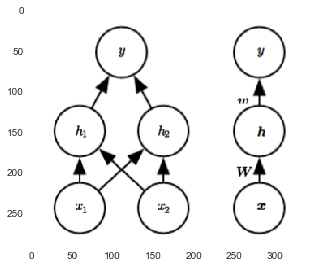

In [2]:
show_image("fig6_2.png", figsize=(5, 8))

default activation function is rectified linear unit (ReLU): $g(z) = max\{0, z\}$
+ advantage:
  1. piecewise linear function: very close to linear.
  2. easy to optimize with gradient-base methods.

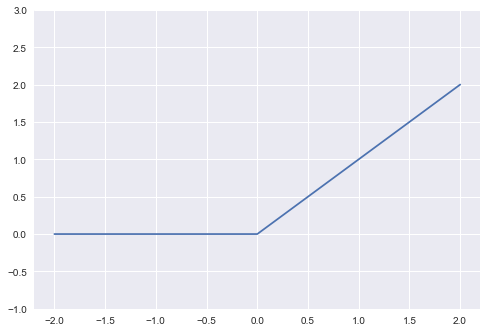

In [3]:
relu = lambda x: np.maximum(0, x)

x = np.linspace(-2, 2, 1000)
y =  relu(x)

plt.ylim([-1, 3])
plt.grid(True)
plt.plot(x, y)

### 6.2 Gradient-Based Learning

important:

+ initialize all weights to small random values.
+ initialize biases to zero or small positive values (push result to right area of ReLU).


#### 6.2.1 Cost Functions

In most cases, 

+ our parametric model defines a distribution $p(y | x; \theta)$,
+ simply use the priciple of maximum likelihood.

$\implies$ [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) as the cost function.


##### 6.2.1.1 Learning Conditional Distributions with Maximum Likelihood

maximum likelihdood in neural networks => cost function is simply the negative log-likelihood == cross-entropy.

\begin{equation}
    J(\theta) = - \mathbb{E}_{x, y \sim \hat{p}_{data}} \log p_{model}(y | x)
\end{equation}

advantage:

+ Specifying a model p(y | x) automatically determines a cost function log p(y | x). => removes the burden of designing cost functions for each model.
+ Undo the exp of some output units => avoid staturate problem (flat area, very small gradient).

unusual property of the cross-entropy cose: does not have a minimum value (negative infinity). => regularization.


##### 6.2.1.2 Learning Conditional Statistics

cost L2: learn mean of y when x is given.

cost L1: learn median of y when x is given.

#### 6.2.2 Output Units

##### 6.2.2.1 Linear Units for Gaussian Output Distributions

Linear output layers are often used to produce the mean of a conditional Gaussian distribution.

这里意思是说，给定$x$，它对应的样本集$y$应是高斯分布。而用线性模型来学习，预测的正是样本集均值$f(x) = \bar{y}$。可见，这种情况常见于回归问题。


##### 6.2.2.2 Sigmoid Units for Bernoulli Output Distributions

binary classification

\begin{align}
    P(y) &= \delta((2y - 1) z) \quad \text{where } z = w^T h + b \\
    J(\theta) &= - \log P(y | x) \quad \text{undo exp} \\
         &= \zeta ((1 - 2y) z)
\end{align}

maximum likelihood is almost always the preferred approach to training sigmoid
output units.


##### 6.2.2.3 Softmax Units for Multinoulli Output Distributions

multiple classification

\begin{equation}
    \operatorname{softmax}(z)_i = \frac{\exp(z_i)}{\sum_j \exp(z_j)}
\end{equation}

\begin{align}
    \log \operatorname{softmax}(z)_i &= z_i - log \sum_j \exp(z_j) \\
        & \approx z_i - \max_j (z_j)
\end{align}

+ Overall, unregularized maximum likelihood will drive the softmax to predict the fraction of counts of counts of each outcome observed in the training set.

+ The argument $z$ can be produced in two different ways:
  1. one vs rest: N estimators
  2. choose one class as "pivot" class: N - 1 estimators
  
+ softmax provides a "softened" version of the argmax.  


##### 6.2.2.4 Other Output Types

In general, think neural network as representing a function $f(x; \thetha) = w$, which provides the parameters for a distribution over $y$. Our loss function can then be inperpreted as $- \log p(y; w(x))$.

### 6.3 Hidden Units

+ Rectified linear units are an excellent default choice of hidden unit.
+ In practice, gradient descent still performs well enough for functions which are not actually differentiable.

#### 6.3.1 Rectified Linear Units and Their Generalizations

#### 6.3.2 Logistic Sigmoid and Hyperbolic Tangent

The widespread saturation of sigmoidal units => use as hidden units is now discouraged.

##### 6.3.3 Other Hidden Units

### 6.4 Architecture Design

+ layers: group of units
+ chain structure
  1. the depth of the network
  2. the width of each layer

#### 6.4.1 Universal Approximation Properties and Depth

universal approximation theorem: large MLP will be able to **represent** any function. However, we are not guaranteed that the training algorithm will be able to **learn** that function.

Empirically, greater depth does seem to result in better generalization.

#### 6.4.2 Other Architectural Considerations

### 6.5 Back-Propagation and Other Differentiation Algorithms

chain rule:

\begin{equation}
    \frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}
\end{equation}

### 6.6 Historical Notes